<a href="https://colab.research.google.com/github/plopezmp/AmI/blob/main/AmI_NoSupervisado_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Referencias

*   Géron, Aurélien. *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems*. O'Reilly Media, 2019. - **(Capítulo 8)**
*  VanderPlas, Jake. *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.", 2016.- **(Capítulo 5)**
* Scikit-klearn documentation on PCA. [online: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

---

# Principal Component Analysis, PCA

Principal Component Analysis, PCA,  es fundamentalmente un algoritmo de reducción de dimensiones, y, como herramienta de *visualización*.
Además, puede servir para otras tareas asociadas con la ingeniería, como filtrado de ruido, extracción de atributos (*features*), etc.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Introducción

El funcionamiento de PCA podemos verlo visulizando un dataset 2D, tal y como generamos a continuación:

In [2]:
rng = np.random.RandomState(1)
rng.rand(2, 2), rng.randn(2, 6)
# rand es U[0,1), #randn N(0,1)

(array([[4.17022005e-01, 7.20324493e-01],
        [1.14374817e-04, 3.02332573e-01]]),
 array([[-0.52817175, -1.07296862,  0.86540763, -2.3015387 ,  1.74481176,
         -0.7612069 ],
        [ 0.3190391 , -0.24937038,  1.46210794, -2.06014071, -0.3224172 ,
         -0.38405435]]))

In [3]:
# Con sólo 6 puntos 2D
X = np.dot(rng.rand(2, 2), rng.randn(2, 6))
X

array([[ 0.7349047 , -0.2163944 ,  0.90606663, -0.1953413 , -1.00030471,
         0.01056171],
       [ 0.57014848,  0.07274614,  0.63691376, -0.29069188, -0.43004034,
        -0.28907025]])

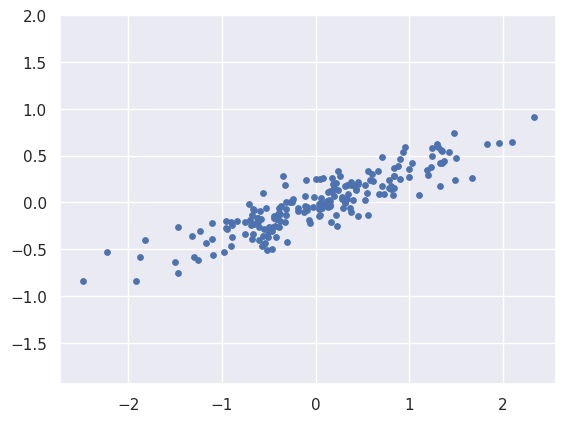

In [4]:
rng = np.random.RandomState(1)
# generamos un total de 200 puntos
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.axis('equal');

A simple vista, parace que existe una correlación entre los valores de $x_1$ y de $x_2$ (coordenadas que representamos en la figura).

Es un problema diferente al de Regresión Lineal donde dado el valor de $x$ intentábamos inferir un valor de $y$. En este caso nuestros datos no están etiquetados (**aprendizaje no supervisado**) e intentamos encontrar la relación entre los dos valores.

En PCA, un valor para esa relación entre los atributos se obtiene calculando los *ejes principales* o componentes principales. Lo podemos calcular usando el estimador PCA de la librería Scikit-Learn:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Los **`components_`** indican la dirección de la variación de los nuevos ejes principales, y, la **`explained_variance`** indica la longitud de ese vector.

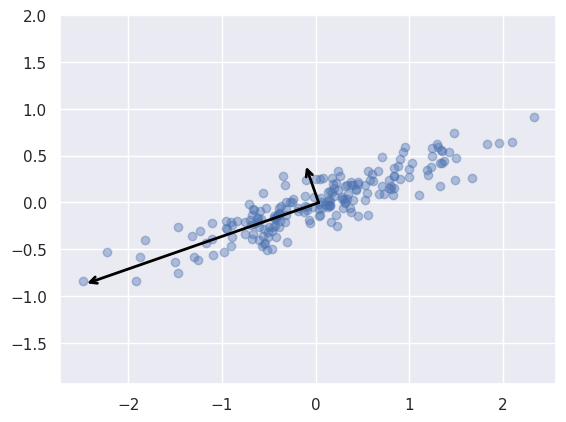

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
# plt.savefig('pca_components.pdf', format='pdf', dpi=500, bbox_inches='tight')

La longitud de los ejes principales, **`explained_variance`**, **indican cuánta *información*** o cómo de importante es ese eje principal para describir la distribución de los datos originales.
Concretamente, es una medida de la varianza de los datos cuando los proyectamos sobre ese eje.

## Reducción de dimensiones

Usar PCA para reducir diimensiones implica **usar los componentes principales que tengan mayor varianza y *eliminar* los componentes con menor varianza**. Es decir, nos interesa usar los componentes que representen la varianza mayor de nuestros datos originales.

Un ejemplo de reducción de dimensiones:

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("dimensiones originales:   ", X.shape)
print("dimensiones transformadas:", X_pca.shape)

dimensiones originales:    (200, 2)
dimensiones transformadas: (200, 1)


Hemos reducido a una sóla dimensión. Para comprender el efecto de esta reducción podemos realizar la transformación inversa (**reconstrucción**) y representar los datos junto con los datos originales:

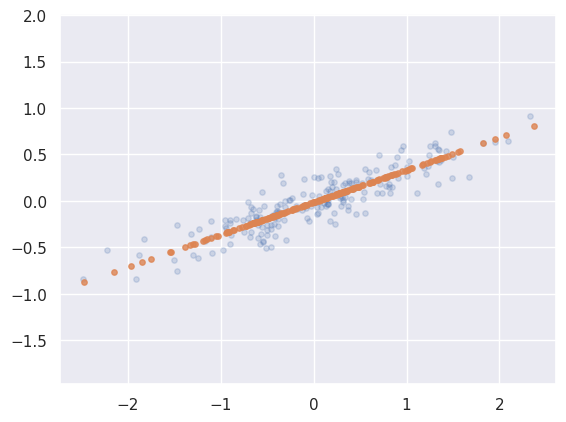

In [9]:
X_new = pca.inverse_transform(X_pca)

# datos originales (AZUL)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,s=15)

# datos reconstruidos (NARANJA)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,s=15)
plt.axis('equal');

Los datos azul-claro son los datos originales y los naranja son la versión proyectada de esos puntos en una dimensión. Hemos eliminado la información del eje principal con menor varianza (menos importante) y dejado del el componente de mayor varianza.

## PCA para visualizar datos: Iris dataset

Vamos a cargar el dataset desde la url donde está el archivo `.csv`, y, lo almacenamos en un dataframe de la librería $\sf{pandas}$.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

### Normalización

Procedemos a normalizar los datos con media=0 y varianza=1 como requisito para mejorar el funcionamiento del algoritmo.

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['target']].values

In [ ]:
x = StandardScaler().fit_transform(x)
# StandardScaler equivale a:
# z = (x - mean) / standard deviation

In [ ]:
pd.DataFrame(data = x, columns = features).head()

sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977

### Proyección a 2D

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767

In [ ]:
df[['target']].head()

target
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

### Visualización de la proyección 2D

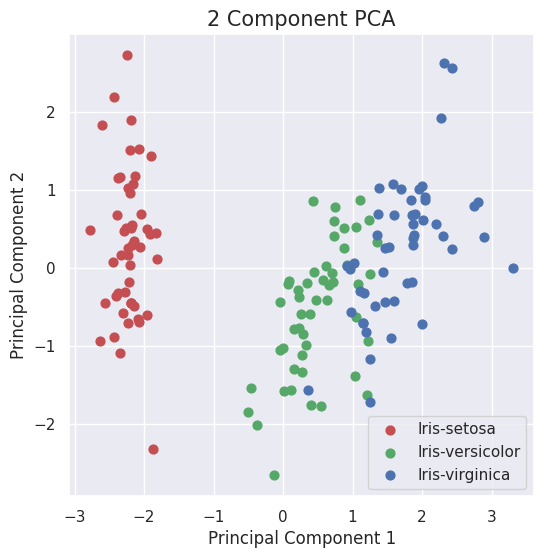

In [ ]:
plt.figure(figsize = (6,6))
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 40)
plt.legend(targets)
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2 Component PCA', fontsize = 15)
plt.show()

Las tres clases parecen estar separadas, sobre todo *iris-setosa*.

### Del mismo modo podemos usar PCA para reducir la dimensión e intentar analizar datos en una tabla:

### Explained Variance

Como hemos comentado, este valor nos mide cuánta información puede atribuirse a cada componente principal

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

De forma conjunta los dos componentes principales **suman 95.8% de la información**. El tercer y cuarto componentes principales contienen el resto de información del dataset.

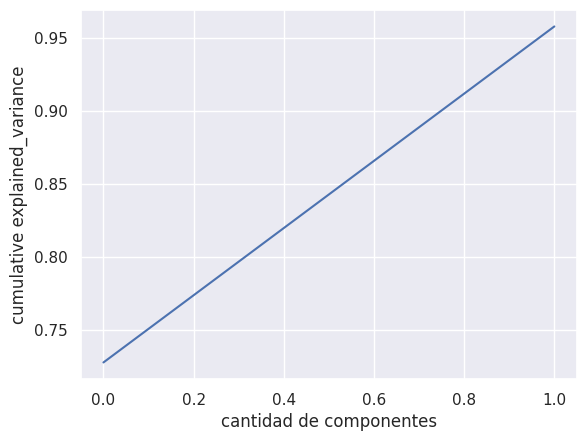

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('cantidad de componentes')
plt.ylabel('cumulative explained_variance');

***

### Ejemplo 2: visualización

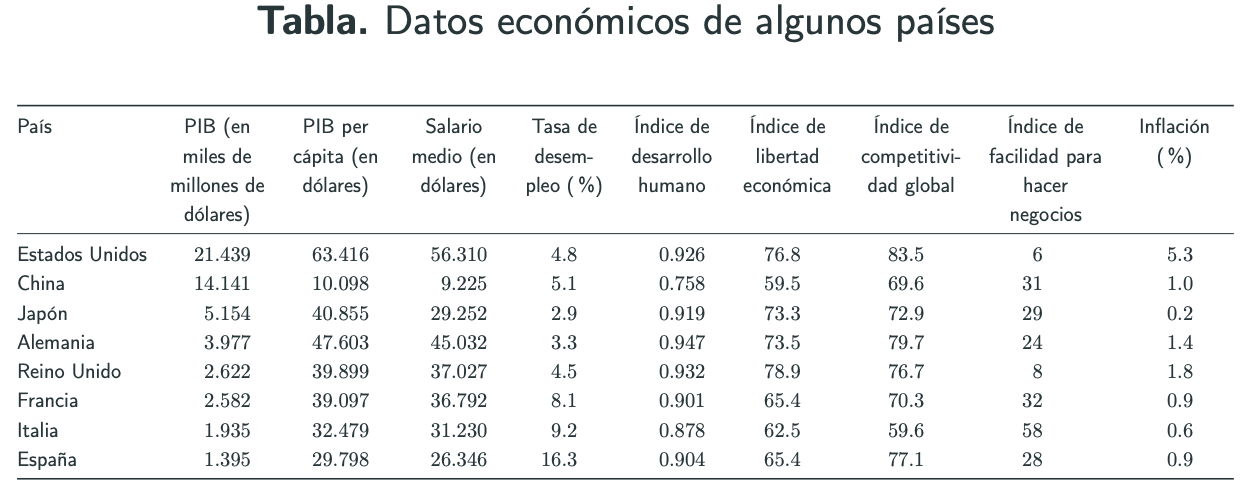

        x_1       x_2            País
0  4.081446  1.473442  Estados Unidos
1 -2.800911  2.704437           China
2  0.034580 -0.506235           Japón
3  1.462428 -0.806012        Alemania
4  1.469300 -0.514896     Reino Unido
5 -0.651649 -0.675781         Francia
6 -2.485694 -0.882982          Italia
7 -1.109500 -0.791974          España


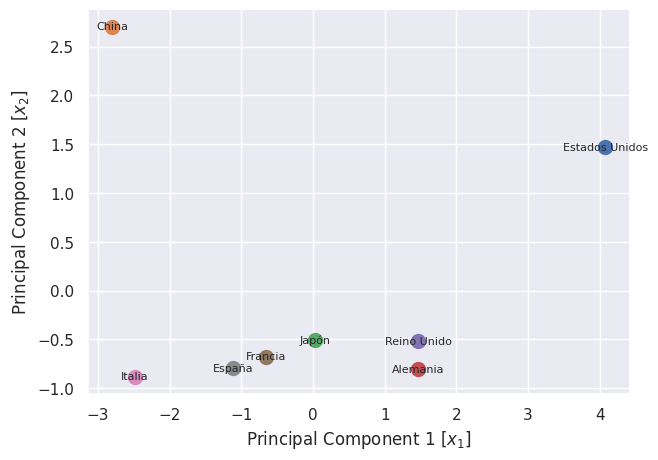

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# definir los datos
data = {"País": ["Estados Unidos", "China", "Japón", "Alemania", "Reino Unido", "Francia", "Italia", "España"],
        "Población": [21.439, 14.141, 5.154, 3.977, 2.622, 2.582, 1.935, 1.395],
        "PIB": [63.416, 10.098, 40.855, 47.603, 39.899, 39.097, 32.479, 29.798],
        "PIB per cápita": [56.310, 9.225, 29.252, 45.032, 37.027, 36.792, 31.230, 26.346],
        "Tasa de desempleo": [4.8, 5.1, 2.9, 3.3, 4.5, 8.1, 9.2, 16.3],
        "Índice de desarrollo humano": [0.926, 0.758, 0.919, 0.947, 0.932, 0.901, 0.878, 0.904],
        "Esperanza de vida": [76.8, 59.5, 73.3, 73.5, 78.9, 65.4, 62.5, 65.4],
        "Porcentaje de gasto en educación": [83.5, 69.6, 72.9, 79.7, 76.7, 70.3, 59.6, 77.1],
        "Índice de libertad económica": [6, 31, 29, 24, 8, 32, 58, 28],
        "Índice de percepción de corrupción": [5.3, 1.0, 0.2, 1.4, 1.8, 0.9, 0.6, 0.9]}

# crear un dataframe a partir de los datos
df = pd.DataFrame(data)

# normalizar los datos
normalized_df = (df.iloc[:,1:]-df.iloc[:,1:].mean())/df.iloc[:,1:].std()
# esto es lo mismo que esto:
# scaler = StandardScaler()
# df[features] = scaler.fit_transform(df[features])
# donde features es
# Definimos los features que queremos incluir en el análisis
# features = ['Poblacion (millones)', 'PIB (miles de millones USD)', 'Exportaciones (miles de millones USD)', 'Tasa de desempleo',
#            'Indice de desarrollo humano', 'Esperanza de vida', 'Tasa de mortalidad infantil', 'Usuarios de internet (millones)',
#            'Porcentaje de poblacion que usa internet']

# crear objeto PCA
pca = PCA(n_components=2)

# aplicar PCA a los datos normalizados
principal_components = pca.fit_transform(normalized_df)

# crear un nuevo dataframe con las componentes principales
principal_df = pd.DataFrame(data = principal_components, columns = ['x_1', 'x_2'])

# agregar los nombres de los países al dataframe de componentes principales
principal_df = pd.concat([principal_df, df['País']], axis=1)

# Imprimimos el nuevo DataFrame
print(principal_df)

# graficar los datos en un scatterplot
fig, ax = plt.subplots(figsize=(7,5))

for i, row in principal_df.iterrows():
    ax.scatter(row['x_1'], row['x_2'], s=100)
    ax.annotate(row['País'], xy=(row['x_1'], row['x_2']), fontsize=8, ha='center', va='center')

# agregar etiquetas a los ej
plt.xlabel('Principal Component 1 [$x_1$]', fontsize = 12)
plt.ylabel('Principal Component 2 [$x_2$]', fontsize = 12)
plt.savefig('PCA_countries.pdf', format='pdf', dpi=500, bbox_inches='tight')

### Selección de la cantidad de componentes principales

Una parte fundamental de PCA es *estimar* cuántos componentes principales necesitamos para describir los datos. Lo podemos ver representando el valor anterior, el acumulado del $\sf{explained\_variance\_ratio\_}$.

Podemos probar un dataset de mayor dimensionalidad que el anteririor. Por ejemplo, el dataset de imágenes con dígitos de 8x8 pixeles (64 dimensiones).

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

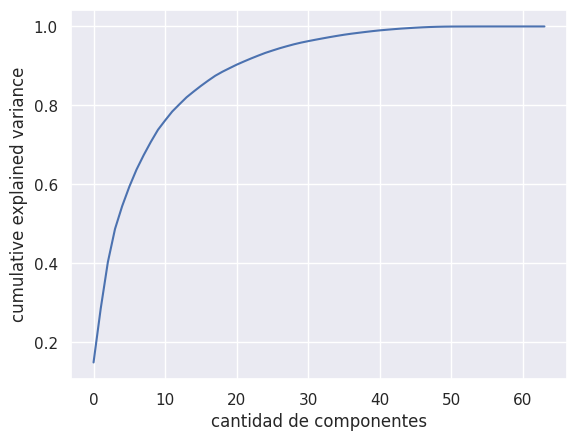

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('cantidad de componentes')
plt.ylabel('cumulative explained variance');

Podemos observar que con 10 componentes mantenemos aproximadamente el 75% de la varianza, y, que con 50 ya conseguiríamos aproximadamente el 100%.

Podemos observar que con una proyección en 2 dimensiones perdemos bastante información (medida con el `explained_variance_`, y, necesitaríamos 20 componentes para alcanzar el 90% de varianza.

## PCA para filtrado de ruido

Curiosamente al reducir la cantidad de dimensiones conseguimos reducir el posible ruido que pueda haber en los datos originales.

La idea es que cualquier componente con varianza mayor que el efecto del ruido, debería estar relativamente poco afectada por el ruido. De esta forma, si reconstruimos la imagen usando los componentes principales de mayor varianza, deberíamos mantener la imagen (dato original) y eliminar el posible ruido.

Podemos hacer la prueba con el dataset de dígitos.

**Veamos cómo son los dígitos originales, sin ruido:**

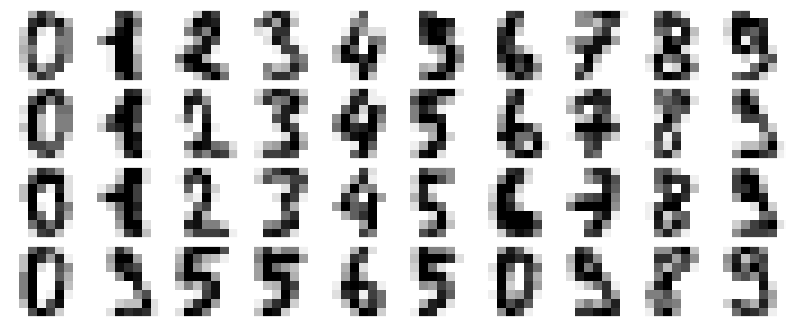

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)

Ahora añadamos ruido a cada pixel de cada una de la imágenes:

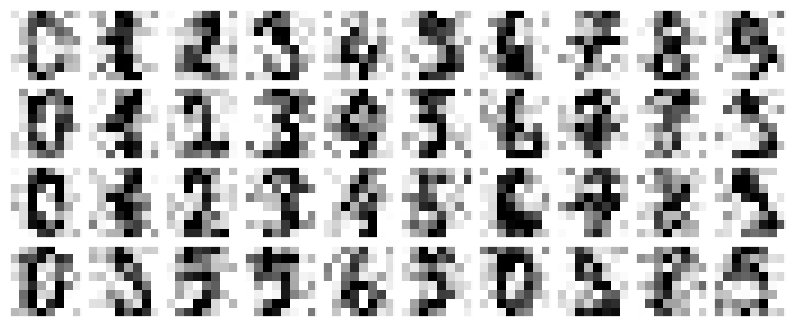

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4) # sigma=4
plot_digits(noisy)

A simple vista apreciamos que los dígitos están afectados por el ruido. Podemos aumentar o disminuir el ruido cambiando el valor de sigma en la Gaussiana.

Vamos a ajustar PCA con los datos con ruido, y, a**justar la proyección para que mantenga el 50% de la varianza**:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

El 50% de la varianza la mantenemos con 12 componentes principales. Ahora, vamos a calcular esos componetes y reconstruir los dígitos *filtrados* pasando de 12 a 64 dimensiones:

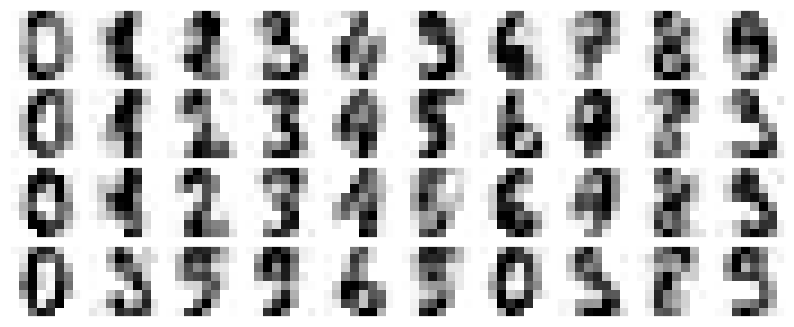

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

****